# Sales analysis


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## merging monthly data into a yearly dataset

In [18]:
df= pd.read_csv('D:\Data analysis\Data analysis projects\datasets\Sales_Data\Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [23]:
directory_path = 'D:/Data analysis/Data analysis projects/datasets/Sales_Data'

files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

yearly_data = pd.DataFrame()

for file in files:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    yearly_data = pd.concat([yearly_data, df], ignore_index=True)

output_file_path = 'D:/Data analysis/Data analysis projects/datasets/Sales_Data/yearly_data.csv'

yearly_data.to_csv(output_file_path, index=False)

print(f"Concatenated CSV file saved at: {output_file_path}")


Concatenated CSV file saved at: D:/Data analysis/Data analysis projects/datasets/Sales_Data/yearly_data.csv


#### The new data frame

In [25]:
yearly_Sales= pd.read_csv('D:\Data analysis\Data analysis projects\datasets\Sales_Data\yearly_data.csv')
yearly_Sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [26]:
yearly_Sales.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [28]:
df['Product'].unique

<bound method Series.unique of 0         AA Batteries (4-pack)
1          USB-C Charging Cable
2          USB-C Charging Cable
3              27in FHD Monitor
4          USB-C Charging Cable
                  ...          
11681    AAA Batteries (4-pack)
11682                    iPhone
11683                    iPhone
11684    34in Ultrawide Monitor
11685      USB-C Charging Cable
Name: Product, Length: 11686, dtype: object>

In [29]:
yearly_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

# Preparing data for analysis

### Dropping the null values

In [33]:
pd.isnull(np.nan)

True

In [43]:
nan_df= yearly_data[yearly_data.isna().any(axis=1)]
nan_df.head()
yearly_Sales = yearly_data.dropna(how='all')
yearly_Sales.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [48]:
temp_df = yearly_Sales[yearly_Sales['Order Date'].str[0:2]== 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


### This shows there is some error is various rows in our data which is causing errors in creating the  month coloum

In [49]:
yearly_Sales= yearly_Sales[yearly_Sales['Order Date'].str[0:2] != 'Or']


  #### Adding a month coloum

In [50]:
yearly_Sales['Month'] = yearly_Sales['Order Date'].str[0:2]
yearly_Sales['Month'] = yearly_Sales['Month'].astype('int32')
yearly_Sales.head()

C:\Users\User\AppData\Local\Temp\ipykernel_2348\1566257131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_Sales['Month'] = yearly_Sales['Order Date'].str[0:2]
C:\Users\User\AppData\Local\Temp\ipykernel_2348\1566257131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_Sales['Month'] = yearly_Sales['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Converting the columns in correct type

In [56]:
yearly_Sales['Quantity Ordered']= pd.to_numeric(yearly_Sales['Quantity Ordered'], errors='coerce')
yearly_Sales['Price each'] = pd.to_numeric(yearly_Sales['Price Each'])

C:\Users\User\AppData\Local\Temp\ipykernel_2348\928835104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_Sales['Quantity Ordered']= pd.to_numeric(yearly_Sales['Quantity Ordered'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_2348\928835104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_Sales['Price each'] = pd.to_numeric(yearly_Sales['Price Each'])


In [84]:
yearly_Sales['Sales'] = pd.to_numeric(yearly_Sales['Sales'], errors='coerce')
yearly_Sales = yearly_Sales.dropna(subset=['Sales'])

yearly_Sales['Sales'] = yearly_Sales['Sales'].astype('float64')

print(yearly_Sales.dtypes)

Order ID             object
Product              object
Quantity Ordered      int64
Price Each           object
Order Date           object
Purchase Address     object
Month                 int32
Price each          float64
Sales               float64
dtype: object


# Data analysis

### Which month had best sales and how much was earned during that month

In [64]:
yearly_Sales['Sales']= yearly_Sales['Quantity Ordered'] * yearly_Sales['Price Each']
yearly_Sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price each,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,11.95,11.9511.95
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,11.99


In [89]:
total= yearly_Sales.groupby('Month').sum()

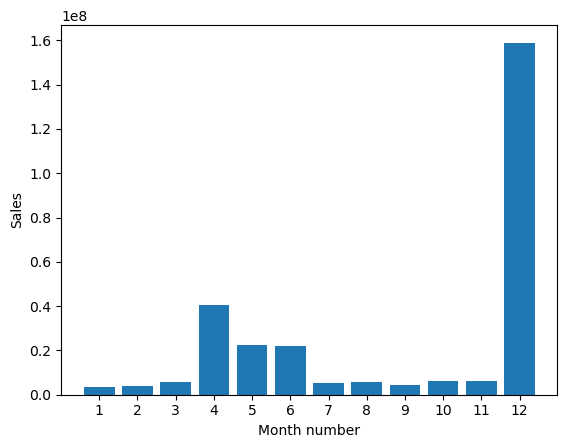

In [91]:
months = range(1,13)
plt.bar(months, total['Sales'])
plt.xticks(months)
plt.ylabel('Sales')
plt.xlabel('Month number')
plt.show()

#### As seen, the 12th month i.e December has the highest number os sales

### Which city has highest number of sales? 

In [96]:
yearly_Sales['Purchase Address'].unique


<bound method Series.unique of 2               682 Chestnut St, Boston, MA 02215
3            669 Spruce St, Los Angeles, CA 90001
4            669 Spruce St, Los Angeles, CA 90001
5               333 8th St, Los Angeles, CA 90001
6          381 Wilson St, San Francisco, CA 94016
                           ...                   
186844     976 Forest St, San Francisco, CA 94016
186846    216 Dogwood St, San Francisco, CA 94016
186847       220 12th St, San Francisco, CA 94016
186848     511 Forest St, San Francisco, CA 94016
186849     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 168703, dtype: object>

#### adding a city coloumn 

In [111]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

yearly_Sales['City'] = yearly_Sales['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
yearly_Sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price each,Sales,City
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,99.0,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.0,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.0,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,11.0,Los Angeles (CA)
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,11.0,San Francisco (CA)


In [108]:
grouped_city = yearly_Sales.groupby('City')


total_sales_per_city = grouped_city['Sales'].sum()


print(total_sales_per_city)

City
 Atlanta            5208697.0
 Austin             2545644.0
 Boston           174308254.0
 Dallas             4080856.0
 Los Angeles       11930961.0
 New York City     26149295.0
 Portland           4790801.0
 San Francisco     50748796.0
 Seattle            4913090.0
Name: Sales, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Atlanta'),
  Text(1, 0, ' Austin'),
  Text(2, 0, ' Boston'),
  Text(3, 0, ' Dallas'),
  Text(4, 0, ' Los Angeles'),
  Text(5, 0, ' New York City'),
  Text(6, 0, ' Portland'),
  Text(7, 0, ' San Francisco'),
  Text(8, 0, ' Seattle')])

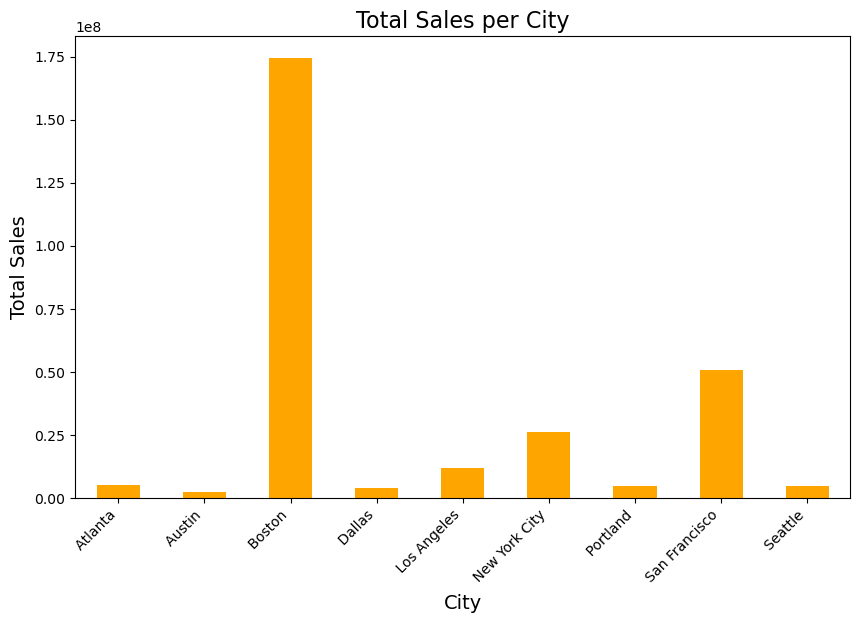

In [114]:
total_sales_per_city.plot(kind='bar', color='orange', figsize=(10, 6))
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.title('Total Sales per City', fontsize=16)
plt.xticks(rotation=45, ha='right')

#### As seen Boston has the highest number os sales

### What time does advertizements work best? 

In [115]:
yearly_Sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price each,Sales,City
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,99.0,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.0,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.0,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,11.0,Los Angeles (CA)
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,11.0,San Francisco (CA)


#### We will analyse the purchase times

In [117]:
yearly_Sales['Order Date']= pd.to_datetime(yearly_Sales['Order Date'])
yearly_Sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price each,Sales,City
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,99.0,Boston (MA)
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.0,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.0,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,11.0,Los Angeles (CA)
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,11.0,San Francisco (CA)


In [118]:
yearly_Sales['Hour'] = yearly_Sales['Order Date'].dt.hour
yearly_Sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price each,Sales,City,Hour
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,99.0,Boston (MA),22
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.0,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.0,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,11.0,Los Angeles (CA),9
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,11.0,San Francisco (CA),13


([<matplotlib.axis.XTick at 0x224dc4a31d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

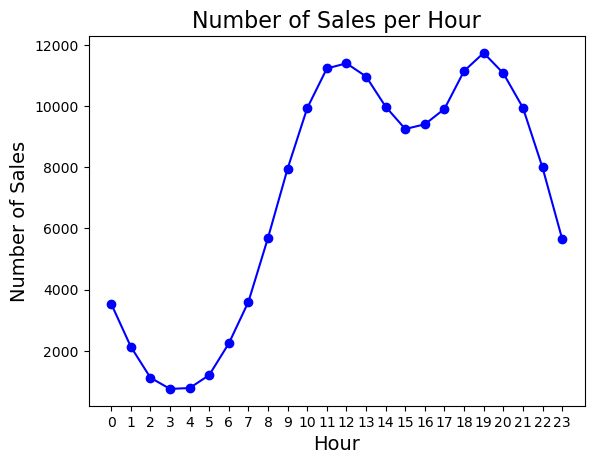

In [132]:
hours = [hour for hour, df in yearly_Sales.groupby('Hour')]
counts = yearly_Sales.groupby('Hour').count()

plt.plot(hours, counts['Sales'], marker='o', linestyle='-', color='blue')
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.title('Number of Sales per Hour', fontsize=16)
plt.xticks(hours)

#### As seen the prime purchase time peaks from 5:00 hours

([<matplotlib.axis.XTick at 0x224de4d8610>,
 [Text(0.0, 0, '20in Monitor'),
  Text(1.0, 0, '27in 4K Gaming Monitor'),
  Text(2.0, 0, '27in FHD Monitor'),
  Text(3.0, 0, '34in Ultrawide Monitor'),
  Text(4.0, 0, 'AA Batteries (4-pack)'),
  Text(5.0, 0, 'AAA Batteries (4-pack)'),
  Text(6.0, 0, 'Apple Airpods Headphones'),
  Text(7.0, 0, 'Bose SoundSport Headphones'),
  Text(8.0, 0, 'Flatscreen TV'),
  Text(9.0, 0, 'Google Phone'),
  Text(10.0, 0, 'LG Dryer'),
  Text(11.0, 0, 'LG Washing Machine'),
  Text(12.0, 0, 'Lightning Charging Cable'),
  Text(13.0, 0, 'Macbook Pro Laptop'),
  Text(14.0, 0, 'ThinkPad Laptop'),
  Text(15.0, 0, 'USB-C Charging Cable'),
  Text(16.0, 0, 'Vareebadd Phone'),
  Text(17.0, 0, 'Wired Headphones'),
  Text(18.0, 0, 'iPhone')])

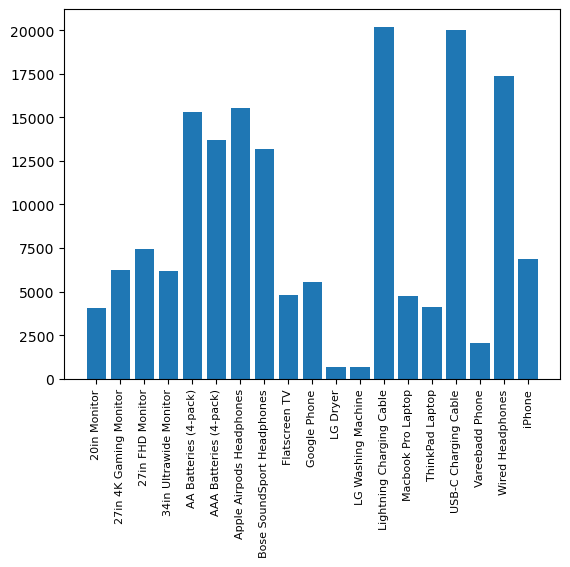

In [161]:
product_group= yearly_Sales.groupby('Product')
quantity= product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products, quantity)
plt.xticks(products, rotation= 'vertical', size= 8)
